In [1]:
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt
import random
import funcoes as func


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error

Importaremos o dataset modificado no arquivo anterior.

In [2]:
datasetTreino = pd.read_csv("./DataTreinoModificada.csv")
data = datasetTreino.date.apply(lambda linha: datetime.strptime(linha, '%Y-%m-%d'))

datasetTreino['date'] = data
datasetTreino.set_index('date', inplace = True)
datasetTreino.head()

,store,item,sales_F,ano,mes,dia,diaSemana,trimestre
date,,,,,,,,
2013-01-01,1,1,3.605551,2013,1,1,1,1
2013-01-02,1,1,3.316625,2013,1,2,2,1
2013-01-03,1,1,3.741657,2013,1,3,3,1
2013-01-04,1,1,3.605551,2013,1,4,4,1
2013-01-05,1,1,3.162278,2013,1,5,5,1


Como 'quebramos' a coluna `date`em várias outras colunas podemos excluir a coluna `date`do nosso conjunto de dados.

In [3]:
dataFinal = datasetTreino.reset_index().drop(['date'], axis = 1)
dataFinal.head()

,store,item,sales_F,ano,mes,dia,diaSemana,trimestre
0,1,1,3.605551,2013,1,1,1,1
1,1,1,3.316625,2013,1,2,2,1
2,1,1,3.741657,2013,1,3,3,1
3,1,1,3.605551,2013,1,4,4,1
4,1,1,3.162278,2013,1,5,5,1


In [4]:
dataFinal.describe()

,store,item,sales_F,ano,mes,dia,diaSemana,trimestre
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,6.954347,2015.000548,6.523549,15.727820,3.001643,2.508762
std,2.872283,14.430878,1.971637,1.414021,3.448535,8.799329,1.999316,1.117020
min,1.000000,1.000000,0.000000,2013.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,13.000000,5.477226,2014.000000,4.000000,8.000000,1.000000,2.000000
50%,5.500000,25.500000,6.855655,2015.000000,7.000000,16.000000,3.000000,3.000000
75%,8.000000,38.000000,8.366600,2016.000000,10.000000,23.000000,5.000000,4.000000
max,10.000000,50.000000,15.198684,2017.000000,12.000000,31.000000,6.000000,4.000000


## Separando em dados de treino e teste

Devido ao hardware e também um possível overfitting irei usar apenas uma amostra dos dados para treinamento.

In [5]:
tamanho = 100000
random.seed(38)
amostraIndex = random.choices(dataFinal.index, k = tamanho)
amostra = dataFinal.iloc[amostraIndex, :]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(amostra.drop(['sales_F'], axis = 1), 
                                                    amostra['sales_F'], 
                                                    test_size=0.30, 
                                                    random_state=42)

## Treinando e avaliando o modelo de machine learning

* Teste parâmetros diferentes
* Se não der teste modelos mais poderosos como o gradientebooster (veja o que cada modelo espera receber)
* Faça mais engenharia de dados

In [43]:
regr = RandomForestRegressor(random_state = 101, 
                             max_depth = 25,
                             n_jobs = 2)

regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=20,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=2, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [44]:
previsao = regr.predict(X_test)

residuos = previsao - y_test

Precisamos avaliar o modelo agora para saber o quão bem ou mal nosso modelo foi. As métricas `explained_variance_score` e `R^2 score` quanto mais próximo de 1 melhor é o nosso modelo. Já a `mean_absolute_error`quanto mais próxima de zero melhor é o nosso modelo.

In [45]:
print("Variância explicada = ", explained_variance_score(y_test, previsao))

print("R^2 = ",r2_score(y_test, previsao))

print("Erro médio absoluto = ", mean_absolute_error(y_test, previsao))

Variância explicada =  0.4048623665628991
R^2 =  0.40485886104945057
Erro médio absoluto =  1.2230300998764374


Esperamos que o resíduo siga uma distribuição normal.

Variância explicada =  0.912398869994278
R^2 =  0.912398867542889
Erro médio absoluto =  0.45746417022661323

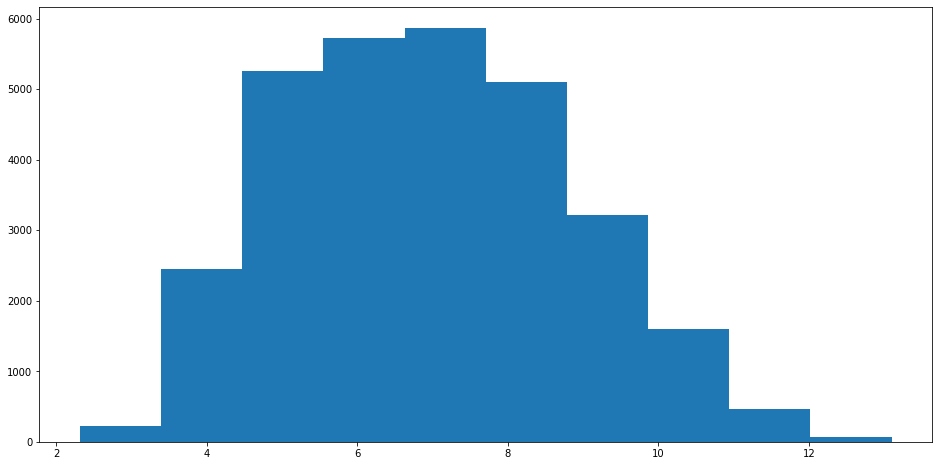

In [12]:
plt.figure(figsize=(16, 8))
plt.hist(previsao)
plt.show()

## Aplicando ao dataset de teste

In [14]:
dataTeste = pd.read_csv("./Dataset/test.csv")
dataTesteTemp = dataTeste.date.apply(lambda linha: datetime.strptime(linha, '%Y-%m-%d'))

dataTeste['date'] = dataTesteTemp
dataTeste.set_index('date', inplace = True)
dataTeste.head()

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-02,1,1,1
2018-01-03,2,1,1
2018-01-04,3,1,1
2018-01-05,4,1,1


Pegamos todas as transformações que aplicamos no dataset de treino e juntamos tudo em uma função só e aplicamos aos dados de teste para que tenha o mesmo formato dos dados de treino

In [15]:
dataTesteFormatoPadrao = func.formatoIdeal(dataTeste, True)
dataTesteFormatoPadrao.head()

,id,store,item,ano,mes,dia,diaSemana,trimestre
date,,,,,,,,
2018-01-01,0,1,1,2018,1,1,0,1
2018-01-02,1,1,1,2018,1,2,1,1
2018-01-03,2,1,1,2018,1,3,2,1
2018-01-04,3,1,1,2018,1,4,3,1
2018-01-05,4,1,1,2018,1,5,4,1


In [16]:
dataTesteFormatoPadrao.reset_index('date', inplace = True)
dataTesteFormatoPadrao.drop(['date'], axis = 1, inplace = True)
dataTesteFormatoPadrao.set_index('id', inplace = True)

Como o modelo foi treinado quando aplicamos a raiz quadrada na coluna `sales` precisamos elevar ao quadrado a predição para retorna a escala original. 

In [17]:
resposta = regr.predict(dataTesteFormatoPadrao)
resposta = (resposta**2)

In [18]:
myDict = {"id": dataTesteFormatoPadrao.index,
          "sales": resposta}

ResultadoDF = pd.DataFrame(myDict)

## salvando os resultados

In [19]:
ResultadoDF.to_csv("./Dataset/submission.csv", index=False)

## Salvando o modelo

Usaremos o modelo treinado para criar um app web que gere as previsões para o dataset usado nesse projeto!

In [42]:
joblib.dump(regr, './webApp/modeloFinalMinimal.pkl.gzip', compress = 8)

['./webApp/modeloFinalMinimal.pkl.gzip']

# FIM